# **Objetivo General de la Práctica**
*Desarrollar habilidades para generar variables aleatorias a partir de
diferentes distribuciones mediante el método de la transformada
inversa. Esto permitirá comprender la aplicación del método en
problemas reales donde los tiempos, la demanda y la frecuencia de
eventos aleatorios influyen en el comportamiento de un sistema.*

# **Problema 3: Distribución LogNormal**
***Contexto:*** En una tienda departamental de electrónica, los tiempos de
espera de los clientes para recibir atención en el mostrador de servicio
técnico tienen una distribución lognormal. Se sabe que el tiempo
promedio de espera es de 10 minutos y una desviación estándar de 2
minutos, lo que genera una cola considerable en ciertos momentos del
día.


***Objetivo:*** Generar tiempos de espera para 50 clientes en el mostrador de
servicio y analizar la duración de la fila de espera.

In [78]:
# Alumna: Romero Jiménez Sofía Cristal
# No. Control: 23041077

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [83]:
# Parámetros de la Distribución Binomial
media_espera = 10  # Minutos (esperanza)
desviacion_espera = 2  # Minutos (desviación estándar)
num_clientes = 50  # Cantidad de clientes a simular

# Conversión a parámetros de la distribución LogNormal
mu = np.log(media_espera**2 / np.sqrt(desviacion_espera**2 + media_espera**2))
sigma = np.sqrt(np.log(1 + (desviacion_espera**2 / media_espera**2)))

# Generación de datos (Distribución LogNormal)
tiempos_espera = np.random.lognormal(mu, sigma, num_clientes)


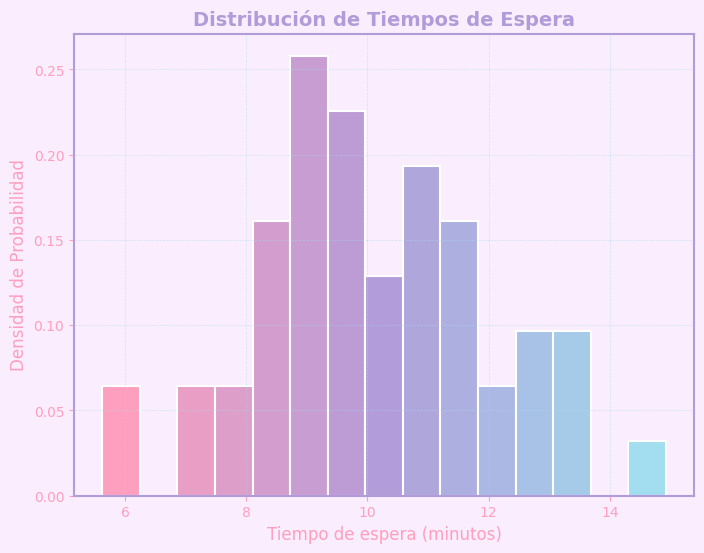

In [87]:
#Diseño de la gráfica
plt.figure(figsize=(8, 6))

# Paleta de colores inspirada en Seraphine de K/DA
rosa_pastel = '#FF9FBF'
morado_pastel = '#B19CD9'
azul_pastel = '#A2DDF0'
blanco = '#FFFFFF'
gris_lila = '#faedfd'

# Colormap personalizado
colors = [rosa_pastel, morado_pastel, azul_pastel]
cmap = LinearSegmentedColormap.from_list("custom_seraphine", colors, N=100)

# Histograma
n, bins, patches = plt.hist(tiempos_espera, bins=15, edgecolor=blanco, linewidth=1.5, density=True)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col) if max(col) > 0 else 1
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))

# Configuración de la gráfica
plt.title("Distribución de Tiempos de Espera", fontsize=14, color=morado_pastel, fontweight='bold')
plt.xlabel("Tiempo de espera (minutos)", fontsize=12, color=rosa_pastel)
plt.ylabel("Densidad de Probabilidad", fontsize=12, color=rosa_pastel)
plt.tick_params(colors=rosa_pastel)
plt.gca().set_facecolor(gris_lila)
plt.gcf().set_facecolor(gris_lila)
for spine in plt.gca().spines.values():
    spine.set_edgecolor(morado_pastel)
    spine.set_linewidth(1.5)
plt.grid(True, linestyle='--', linewidth=0.5, color=azul_pastel, alpha=0.5)

plt.show()